Линейная модель(результат не очень)

MAE: 0.8188732376449092, MSE: 0.7791349637019083, RMSE: 0.882686220410123


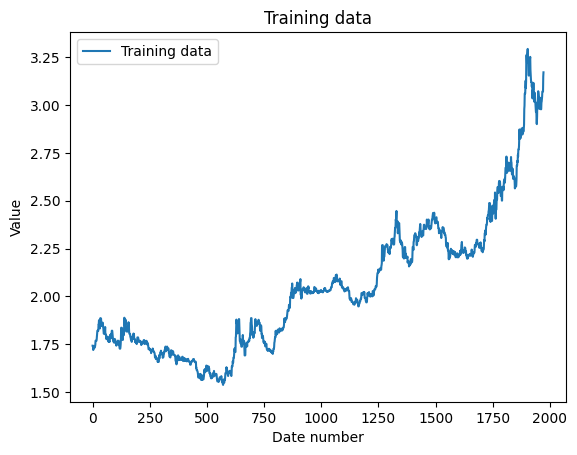

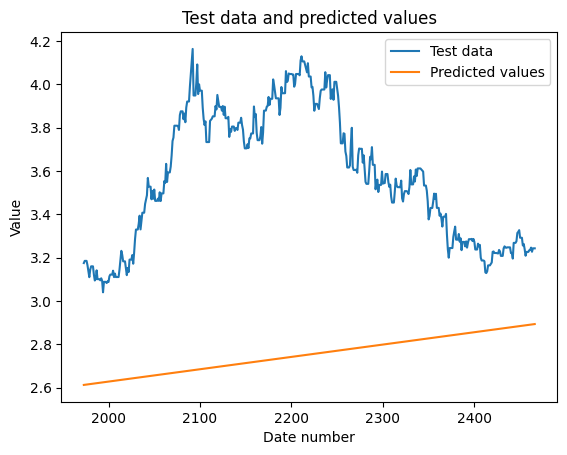

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Считывание данных из файла input.csv
data = pd.read_csv('input.csv', index_col='Date', parse_dates=True)

# Добавление порядкового номера даты в качестве признака
data['date_num'] = np.arange(len(data))

# Разделение данных на обучающую и тестовую выборки
# Здесь мы используем только данные для Бразилии
train, test = train_test_split(data[['date_num', 'Brazil']], test_size=0.2, shuffle=False)

# Обучение модели линейной регрессии на обучающей выборке
model = LinearRegression()
model.fit(train.drop('Brazil', axis=1), train['Brazil'])

# Прогнозирование значений на тестовой выборке
predictions = model.predict(test.drop('Brazil', axis=1))

# Вычисление метрик качества прогноза
mae = ((test['Brazil'] - predictions).abs()).mean()
mse = ((test['Brazil'] - predictions) ** 2).mean()
rmse = (mse) ** (1 / 2)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Добавление спрогнозированных значений в исходные данные
data['Brazil_predicted'] = np.nan
data.loc[test.index, 'Brazil_predicted'] = predictions

# Сохранение данных в файл output.csv
data.drop('date_num', axis=1).to_csv('output.csv')

# Вывод графика обучающей выборки
plt.plot(train['date_num'], train['Brazil'], label='Training data')
plt.xlabel('Date number')
plt.ylabel('Value')
plt.title('Training data')
plt.legend()
plt.show()

# Вывод графика тестовой выборки и предсказанных значений
plt.plot(test['date_num'], test['Brazil'], label='Test data')
plt.plot(test['date_num'], predictions, label='Predicted values')
plt.xlabel('Date number')
plt.ylabel('Value')
plt.title('Test data and predicted values')
plt.legend()
plt.show()


Нейронная сеть

In [ ]:
import pandas as pdimport, numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
import numpy as np
# form keras.models import Sequential
from keras.layers import Dense, LSTM
# Загружаем данныеdata = pd.read_csv('input.csv')
df = pd.read_csv('public_data.csv')
df=df.drop(columns="Date")
df["time"]=list((i for i in range(df.shape[0])))
#df.drop(columns="time").plot()
#df.plot()
# Разделяем данные на обучающую и тестовую выборки
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8,shuffle=False)
X_train = np.array(X_train)
y_train = np.array(y_train)
# Преобразуем данные для тестовой выборки в аналогичный формат
X_test = np.array(X_test)
y_test = np.array(y_test)
# Преобразуем входные данные для обучения нейронной сети в формат, подходящий для LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Создаем нейронную сеть
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32))
model.add(Dense(1))
# Компилируем нейронную сеть
model.compile(loss='mean_squared_error', optimizer='adam')
# Обучаем нейронную сеть
model.fit(X_train, y_train, epochs=100, batch_size=32)
# Преобразуем входные данные для тестовой выборки в формат, подходящий для LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
# Используем обученную нейронную сеть для прогнозирования значений временных рядов на тестовой выборке
y_pred = model.predict(X_test)
# Добавляем спрогнозированные значения к исходным данным из тестовой выборки
y_predGraphic = y_pred
# Сохраняем результаты прогнозирования в файл output.csvtest_data.to_csv('output.csv', index=False)

График

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df1)
plt.scatter(X_test.to_numpy().tolist(), y_predGraphic)
plt.show()